In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV files
hrg_sayur = '/workspaces/codespaces-jupyter/data/raw/harga_sayuran.csv'
trx_penjualan = '/workspaces/codespaces-jupyter/data/raw/transaksi_penjualan.csv'
df1 = pd.read_csv(hrg_sayur)
df2 = pd.read_csv(trx_penjualan)

# Display the first few rows of each dataframe
print("Harga Sayuran DataFrame:")
print(df1.head())

print("\nTransaksi Penjualan DataFrame:")
print(df2.head())

Harga Sayuran DataFrame:
   Id Jenis Sayuran  Harga Sayuran per KG Tanggal Harga  Musim   Harga Pasar
0   1    Sawi Putih                   969    2021-01-01  Hujan   1078.393929
1   2   Cabe Chilli                 77284    2021-01-01  Hujan  85442.637798
2   3  Cabe Kriting                 30781    2021-01-01  Hujan  34802.678274
3   4    Cabe Rawit                 63241    2021-01-01  Hujan  71506.199259
4   5           Kol                  7904    2021-01-01  Hujan   9019.645111

Transaksi Penjualan DataFrame:
   Transaction Id Jenis Sayuran  Berat (ton) Tanggal Transaksi  \
0               1    Sawi Putih     0.925000        2021-01-01   
1               1   Cabe Chilli     0.925000        2021-01-01   
2               1    Cabe Rawit     0.925000        2021-01-01   
3               1           Kol     0.925000        2021-01-01   
4               2           Kol     0.733333        2021-01-02   

               Destinasi  Total Biaya  Biaya Kirim  
0  Pasar Gudang Sukabumi    185

In [3]:
# Check for missing values
print("\nMissing values in df1:")
print(df1.isnull().sum())

print("\nMissing values in df2:")
print(df2.isnull().sum())

# Handle missing values (example: fill with mean, drop, etc.)
df1 = df1.fillna(df1.mean())
df2 = df2.fillna(df2.mean())



Missing values in df1:
Id                      0
Jenis Sayuran           0
Harga Sayuran per KG    0
Tanggal Harga           0
Musim                   0
Harga Pasar             0
dtype: int64

Missing values in df2:
Transaction Id       0
Jenis Sayuran        0
Berat (ton)          0
Tanggal Transaksi    0
Destinasi            0
Total Biaya          0
Biaya Kirim          0
dtype: int64


/tmp/ipykernel_26703/3527584877.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df1.fillna(df1.mean())
/tmp/ipykernel_26703/3527584877.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df2.fillna(df2.mean())


In [4]:
# Merge datasets if they have a common key
# Example common key: 'product_id'
if 'product_id' in df1.columns and 'product_id' in df2.columns:
    df = pd.merge(df1, df2, on='product_id', how='inner')
else:
    df = pd.concat([df1, df2], axis=1)

print("\nMerged DataFrame:")
print(df.head())



Merged DataFrame:
   Id Jenis Sayuran  Harga Sayuran per KG Tanggal Harga  Musim   Harga Pasar  \
0   1    Sawi Putih                   969    2021-01-01  Hujan   1078.393929   
1   2   Cabe Chilli                 77284    2021-01-01  Hujan  85442.637798   
2   3  Cabe Kriting                 30781    2021-01-01  Hujan  34802.678274   
3   4    Cabe Rawit                 63241    2021-01-01  Hujan  71506.199259   
4   5           Kol                  7904    2021-01-01  Hujan   9019.645111   

   Transaction Id Jenis Sayuran  Berat (ton) Tanggal Transaksi  \
0             1.0    Sawi Putih     0.925000        2021-01-01   
1             1.0   Cabe Chilli     0.925000        2021-01-01   
2             1.0    Cabe Rawit     0.925000        2021-01-01   
3             1.0           Kol     0.925000        2021-01-01   
4             2.0           Kol     0.733333        2021-01-02   

               Destinasi  Total Biaya  Biaya Kirim  
0  Pasar Gudang Sukabumi    1850000.0   3004646.55

In [5]:
df1

,Id,Jenis Sayuran,Harga Sayuran per KG,Tanggal Harga,Musim,Harga Pasar
0,1,Sawi Putih,969,2021-01-01,Hujan,1078.393929
1,2,Cabe Chilli,77284,2021-01-01,Hujan,85442.637798
2,3,Cabe Kriting,30781,2021-01-01,Hujan,34802.678274
3,4,Cabe Rawit,63241,2021-01-01,Hujan,71506.199259
4,5,Kol,7904,2021-01-01,Hujan,9019.645111
...,...,...,...,...,...,...
7660,7661,Cabe Kriting,20632,2023-12-31,Hujan,22859.626016
7661,7662,Cabe Rawit,78973,2023-12-31,Hujan,87924.905348
7662,7663,Kol,4114,2023-12-31,Hujan,4690.649383
7663,7664,Buncis,3224,2023-12-31,Hujan,3564.195786


In [6]:
df2

,Transaction Id,Jenis Sayuran,Berat (ton),Tanggal Transaksi,Destinasi,Total Biaya,Biaya Kirim
0,1,Sawi Putih,0.925000,2021-01-01,Pasar Gudang Sukabumi,1850000.0,3004646.55
1,1,Cabe Chilli,0.925000,2021-01-01,Pasar Induk,1850000.0,3004646.55
2,1,Cabe Rawit,0.925000,2021-01-01,Pasar Induk,1850000.0,3004646.55
3,1,Kol,0.925000,2021-01-01,Pasar Induk,1850000.0,3004646.55
4,2,Kol,0.733333,2021-01-02,Pasar Bogor,2200000.0,2130598.66
...,...,...,...,...,...,...,...
5445,1095,Sawi Putih,0.680000,2023-12-31,Pasar Bogor,1700000.0,1680313.89
5446,1095,Cabe Chilli,0.680000,2023-12-31,Pasar Pasundan Sukabumi,1700000.0,1680313.89
5447,1095,Kol,0.680000,2023-12-31,Pasar Gudang Sukabumi,1700000.0,1680313.89
5448,1095,Cabe Rawit,0.680000,2023-12-31,Pasar Pasundan Sukabumi,1700000.0,1680313.89


In [7]:
pip install scikit-learn



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
harga_harian_sayuran = df1
harga_harian_sayuran['Tanggal Harga'] = pd.to_datetime(harga_harian_sayuran['Tanggal Harga'])

# Encode categorical features
le = LabelEncoder()
harga_harian_sayuran['Jenis Sayuran Encoded'] = le.fit_transform(harga_harian_sayuran['Jenis Sayuran'])
harga_harian_sayuran['Musim Encoded'] = le.fit_transform(harga_harian_sayuran['Musim'])

# Selecting features and label
features = harga_harian_sayuran[['Jenis Sayuran Encoded', 'Musim Encoded']]
labels = harga_harian_sayuran['Harga Sayuran per KG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5, 1.0]
}

# Initialize the GridSearchCV with SVR
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

# Train the tuned SVR model
svr_model_tuned = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svr_model_tuned.fit(X_train, y_train)

# Predict and evaluate the tuned model
y_pred_tuned = svr_model_tuned.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print("Tuned RMSE:", rmse_tuned)


Best Parameters: {'C': 100, 'epsilon': 1.0, 'gamma': 1}
Best RMSE: 15700.213317105385
Tuned RMSE: 14853.803097383548


In [9]:
import joblib
joblib.dump(svr_model_tuned, 'svr_model_tuned.pkl')


['svr_model_tuned.pkl']

In [10]:
import pandas as pd

# Load data
harga_harian_sayuran = df1
transaksi_penjualan_harian = df2

# Print column names
print(harga_harian_sayuran.columns)
print(transaksi_penjualan_harian.columns)


Index(['Id', 'Jenis Sayuran', 'Harga Sayuran per KG', 'Tanggal Harga', 'Musim',
       'Harga Pasar', 'Jenis Sayuran Encoded', 'Musim Encoded'],
      dtype='object')
Index(['Transaction Id', 'Jenis Sayuran', 'Berat (ton)', 'Tanggal Transaksi',
       'Destinasi', 'Total Biaya', 'Biaya Kirim'],
      dtype='object')


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
df1 = pd.read_csv('/workspaces/codespaces-jupyter/data/raw/harga_sayuran.csv')  # harga_harian_sayuran.csv
df2 = pd.read_csv('/workspaces/codespaces-jupyter/data/raw/transaksi_penjualan.csv')  # transaksi_penjualan_harian.csv

# Convert 'Tanggal Harga' and 'Tanggal Transaksi' to datetime
df1['Tanggal Harga'] = pd.to_datetime(df1['Tanggal Harga'])
df2['Tanggal Transaksi'] = pd.to_datetime(df2['Tanggal Transaksi'])

# Create a new feature: Average Price of last 7 days for each vegetable
df1['Average Price 7 Days'] = df1.groupby('Jenis Sayuran')['Harga Sayuran per KG'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Create a new feature: Price Change from previous day
df1['Price Change'] = df1.groupby('Jenis Sayuran')['Harga Sayuran per KG'].diff()

# Fill NaN values resulted from diff
df1['Price Change'].fillna(0, inplace=True)

# Merge the two datasets on date
merged_data = pd.merge(df1, df2, left_on='Tanggal Harga', right_on='Tanggal Transaksi', how='left')

# Encode categorical features
le_jenis = LabelEncoder()
le_musim = LabelEncoder()

merged_data['Jenis Sayuran Encoded'] = le_jenis.fit_transform(merged_data['Jenis Sayuran_x'])
merged_data['Musim Encoded'] = le_musim.fit_transform(merged_data['Musim'])

# Selecting features and label
features = merged_data[['Jenis Sayuran Encoded', 'Musim Encoded', 'Average Price 7 Days', 'Price Change']]
labels = merged_data['Harga Sayuran per KG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the SVR model with new features
svr_model_new_features = SVR(kernel='rbf', C=100, gamma=1, epsilon=1.0)
svr_model_new_features.fit(X_train, y_train)

# Predict and evaluate the model with new features
y_pred_new_features = svr_model_new_features.predict(X_test)
mse_new_features = mean_squared_error(y_test, y_pred_new_features)
rmse_new_features = np.sqrt(mse_new_features)

print("Tuned RMSE with New Features:", rmse_new_features)


Tuned RMSE with New Features: 32551.166900990665


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
df1 = pd.read_csv('/workspaces/codespaces-jupyter/data/raw/harga_sayuran.csv')  # harga_harian_sayuran.csv
df2 = pd.read_csv('/workspaces/codespaces-jupyter/data/raw/transaksi_penjualan.csv')  # transaksi_penjualan_harian.csv

# Convert 'Tanggal Harga' and 'Tanggal Transaksi' to datetime
df1['Tanggal Harga'] = pd.to_datetime(df1['Tanggal Harga'])
df2['Tanggal Transaksi'] = pd.to_datetime(df2['Tanggal Transaksi'])

# Create a new feature: Average Price of last 7 days for each vegetable
df1['Average Price 7 Days'] = df1.groupby('Jenis Sayuran')['Harga Sayuran per KG'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Create a new feature: Price Change from previous day
df1['Price Change'] = df1.groupby('Jenis Sayuran')['Harga Sayuran per KG'].diff()

# Fill NaN values resulted from diff
df1['Price Change'].fillna(0, inplace=True)

# Merge the two datasets on date
merged_data = pd.merge(df1, df2, left_on='Tanggal Harga', right_on='Tanggal Transaksi', how='left')

# Convert weight from tons to kg
merged_data['Berat (kg)'] = merged_data['Berat (ton)'] * 1000

# Encode categorical features
le_jenis = LabelEncoder()
le_musim = LabelEncoder()

merged_data['Jenis Sayuran Encoded'] = le_jenis.fit_transform(merged_data['Jenis Sayuran_x'])
merged_data['Musim Encoded'] = le_musim.fit_transform(merged_data['Musim'])

# Selecting features and label
features = merged_data[['Jenis Sayuran Encoded', 'Musim Encoded', 'Average Price 7 Days', 'Price Change', 'Berat (kg)']]
labels = merged_data['Harga Sayuran per KG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the SVR model with new features
svr_model_new_features = SVR(kernel='rbf', C=100, gamma=1, epsilon=1.0)
svr_model_new_features.fit(X_train, y_train)

# Predict and evaluate the model with new features
y_pred_new_features = svr_model_new_features.predict(X_test)
mse_new_features = mean_squared_error(y_test, y_pred_new_features)
rmse_new_features = np.sqrt(mse_new_features)

print("Tuned RMSE with New Features and Volume:", rmse_new_features)


Tuned RMSE with New Features and Volume: 32551.166937257607


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
df1 = pd.read_csv('/workspaces/codespaces-jupyter/data/raw/harga_sayuran.csv')  # harga_harian_sayuran.csv
df2 = pd.read_csv('/workspaces/codespaces-jupyter/data/raw/transaksi_penjualan.csv')  # transaksi_penjualan_harian.csv

# Convert 'Tanggal Harga' and 'Tanggal Transaksi' to datetime
df1['Tanggal Harga'] = pd.to_datetime(df1['Tanggal Harga'])
df2['Tanggal Transaksi'] = pd.to_datetime(df2['Tanggal Transaksi'])

# Create a new feature: Average Price of last 7 days for each vegetable
df1['Average Price 7 Days'] = df1.groupby('Jenis Sayuran')['Harga Sayuran per KG'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Create a new feature: Price Change from previous day
df1['Price Change'] = df1.groupby('Jenis Sayuran')['Harga Sayuran per KG'].diff()

# Create a new feature: Average Price of the month
df1['Month'] = df1['Tanggal Harga'].dt.to_period('M')
df1['Average Price Monthly'] = df1.groupby(['Jenis Sayuran', 'Month'])['Harga Sayuran per KG'].transform('mean')

# Fill NaN values resulted from diff
df1['Price Change'].fillna(0, inplace=True)

# Merge the two datasets on date
merged_data = pd.merge(df1, df2, left_on='Tanggal Harga', right_on='Tanggal Transaksi', how='left')

# Convert weight from tons to kg
merged_data['Berat (kg)'] = merged_data['Berat (ton)'] * 1000

# Encode categorical features
le_jenis = LabelEncoder()
le_musim = LabelEncoder()

merged_data['Jenis Sayuran Encoded'] = le_jenis.fit_transform(merged_data['Jenis Sayuran_x'])
merged_data['Musim Encoded'] = le_musim.fit_transform(merged_data['Musim'])

# Selecting features and label
features = merged_data[['Jenis Sayuran Encoded', 'Musim Encoded', 'Average Price 7 Days', 'Price Change', 'Berat (kg)', 'Average Price Monthly']]
labels = merged_data['Harga Sayuran per KG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the SVR model with new features
svr_model_new_features = SVR(kernel='rbf', C=100, gamma=1, epsilon=1.0)
svr_model_new_features.fit(X_train, y_train)

# Predict and evaluate the model with new features
y_pred_new_features = svr_model_new_features.predict(X_test)
mse_new_features = mean_squared_error(y_test, y_pred_new_features)
rmse_new_features = np.sqrt(mse_new_features)

print("Tuned RMSE with New Features including Monthly Average:", rmse_new_features)


Tuned RMSE with New Features including Monthly Average: 32551.166937257607


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
df1 = pd.read_csv('/workspaces/codespaces-jupyter/data/raw/harga_sayuran.csv')  # harga_harian_sayuran.csv
df2 = pd.read_csv('/workspaces/codespaces-jupyter/data/raw/transaksi_penjualan.csv')  # transaksi_penjualan_harian.csv

# Convert 'Tanggal Harga' and 'Tanggal Transaksi' to datetime
df1['Tanggal Harga'] = pd.to_datetime(df1['Tanggal Harga'])
df2['Tanggal Transaksi'] = pd.to_datetime(df2['Tanggal Transaksi'])

# Create a new feature: Average Price of last 7 days for each vegetable
df1['Average Price 7 Days'] = df1.groupby('Jenis Sayuran')['Harga Sayuran per KG'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Create a new feature: Price Change from previous day
df1['Price Change'] = df1.groupby('Jenis Sayuran')['Harga Sayuran per KG'].diff()

# Create a new feature: Average Price of the month
df1['Month'] = df1['Tanggal Harga'].dt.to_period('M')
df1['Average Price Monthly'] = df1.groupby(['Jenis Sayuran', 'Month'])['Harga Sayuran per KG'].transform('mean')

# Fill NaN values resulted from diff
df1['Price Change'].fillna(0, inplace=True)

# Merge the two datasets on date
merged_data = pd.merge(df1, df2, left_on='Tanggal Harga', right_on='Tanggal Transaksi', how='left')

# Convert weight from tons to kg
merged_data['Berat (kg)'] = merged_data['Berat (ton)'] * 1000

# Encode categorical features
le_jenis = LabelEncoder()
le_musim = LabelEncoder()

merged_data['Jenis Sayuran Encoded'] = le_jenis.fit_transform(merged_data['Jenis Sayuran_x'])
merged_data['Musim Encoded'] = le_musim.fit_transform(merged_data['Musim'])

# Selecting features and label
features = merged_data[['Jenis Sayuran Encoded', 'Musim Encoded', 'Average Price 7 Days', 'Price Change', 'Berat (kg)', 'Average Price Monthly']]
labels = merged_data['Harga Sayuran per KG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the Random Forest model with new features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model with new features
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("RMSE with Random Forest and New Features:", rmse_rf)


RMSE with Random Forest and New Features: 1120.75232691438


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV with Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = np.sqrt(-grid_search_rf.best_score_)

print("Best Parameters for Random Forest:", best_params_rf)
print("Best RMSE from Grid Search:", best_score_rf)


In [ ]:
from sklearn.model_selection import cross_val_score

# Model Random Forest dengan parameter terbaik dari pencarian grid
rf_model_best = RandomForestRegressor(**best_params_rf, random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf_model_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Hitung RMSE dari cross-validation scores
rmse_cv = np.sqrt(-cv_scores)
mean_rmse_cv = np.mean(rmse_cv)

print("Cross-Validated RMSE: ", mean_rmse_cv)


Cross-Validated RMSE:  1745.3658714626756


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

# Model Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Voting Regressor
ensemble_model = VotingRegressor(estimators=[('rf', rf_model_best), ('gb', gb_model)])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict and evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)

print("Ensemble Model RMSE: ", rmse_ensemble)


Ensemble Model RMSE:  3983.9340762374163


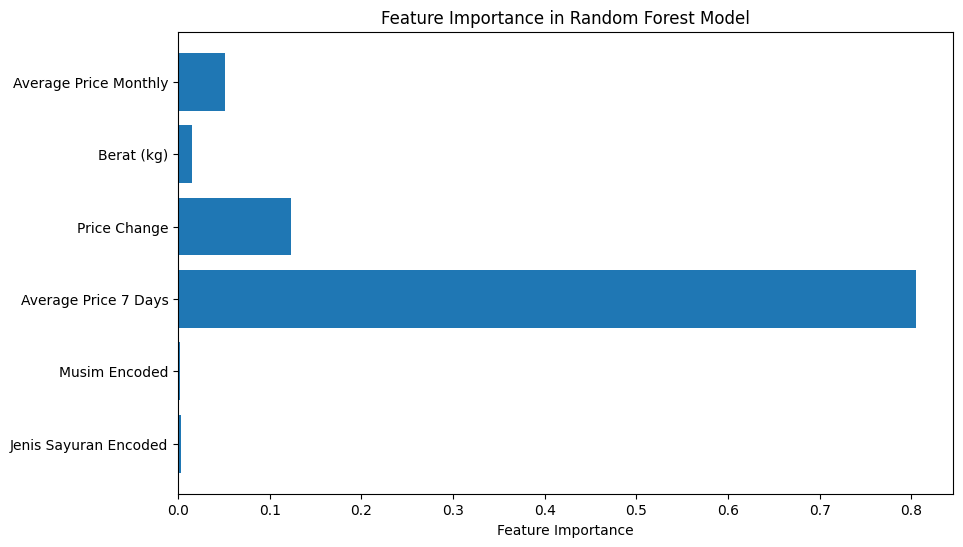

In [ ]:
import matplotlib.pyplot as plt

# Train the final model
rf_model_best.fit(X_train, y_train)

# Feature importances
importances = rf_model_best.feature_importances_
feature_names = features.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [ ]:
# Simplifying the model by using only the most important feature
features_simplified = merged_data[['Average Price 7 Days']]
labels = merged_data['Harga Sayuran per KG']

# Split the data into training and testing sets
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(features_simplified, labels, test_size=0.2, random_state=42)

# Train the Random Forest model with simplified features
rf_model_simplified = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_simplified.fit(X_train_simplified, y_train_simplified)

# Predict and evaluate the model with simplified features
y_pred_simplified = rf_model_simplified.predict(X_test_simplified)
mse_simplified = mean_squared_error(y_test_simplified, y_pred_simplified)
rmse_simplified = np.sqrt(mse_simplified)

print("Simplified Model RMSE: ", rmse_simplified)


Simplified Model RMSE:  2141.491340259593


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a more detailed parameter grid
param_grid_detailed = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV with Random Forest
grid_search_rf_detailed = GridSearchCV(estimator=rf_model, param_grid=param_grid_detailed, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search_rf_detailed.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf_detailed = grid_search_rf_detailed.best_params_
best_score_rf_detailed = np.sqrt(-grid_search_rf_detailed.best_score_)

print("Best Parameters for Random Forest (Detailed):", best_params_rf_detailed)
print("Best RMSE from Grid Search (Detailed):", best_score_rf_detailed)


Best Parameters for Random Forest (Detailed): {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE from Grid Search (Detailed): 2378.729931120431


In [ ]:
# Simplifying the model by using only the most important feature
features_simplified = merged_data[['Average Price 7 Days']]
labels = merged_data['Harga Sayuran per KG']

# Split the data into training and testing sets
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(features_simplified, labels, test_size=0.2, random_state=42)

# Train the Random Forest model with simplified features
rf_model_simplified = RandomForestRegressor(n_estimators=200, bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf_model_simplified.fit(X_train_simplified, y_train_simplified)

# Predict and evaluate the model with simplified features
y_pred_simplified = rf_model_simplified.predict(X_test_simplified)
mse_simplified = mean_squared_error(y_test_simplified)
rmse_simplified = np.sqrt(mse_simplified)

print("Simplified Model RMSE: ", rmse_simplified)


NameError: name 'merged_data' is not defined

### Modeling

Pemodelan dibuat untuk output deploy dashboard

1. Support Vector Regression
2. Arima
3. Random Forest